In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 2: Image Enhancement II: Spatial Smoothing

In this task, we will implement average, gaussian, and median spatial filter.

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-rk6mw8t3
  Created wheel for ee604-plugins: filename=ee604_plugins-0.2.2-cp36-none-any.whl size=2313 sha256=a1667ab0c5a68a0f42d574fb9348cb8f8c05e3c168d5cb85aa79712f429a6b87
  Stored in directory: /tmp/pip-ephem-wheel-cache-agj0xwy5/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-rk6mw8t3


In [3]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=2, task_no=2) # download data for this assignment

Download Complete!


In [4]:
def avgFilter(img, kernel_size=7):
    '''
    Write a program to implement average filter. You have to assume square kernels.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be used for averaging.
    
    Ouputs:
    + out_img - smoothed grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.filter2D() to perform 2D convolution
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    k = kernel_size
    window = (1/pow(k,2))*np.ones((k,k))
    out_img = cv2.filter2D(img, -1, window)


    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [6]:
def gaussianFilter(img, kernel_size=7, sigma=3):
    '''
    Write a program to implement gaussian filter. You have to assume square kernels.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be used for smoothing. 
    + sigma - sigma parameter for gaussian kernel
    
    Ouputs:
    + out_img - smoothed grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.filter2D() to perform 2D convolution
    + cv2.getGaussianKernel(). Note that this will give you 1D gaussian.
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    a = cv2.getGaussianKernel(kernel_size, sigma)
    a_trans = a[:,np.newaxis]
    window =  (1/pow(np.sum(a),2))*a_trans*a

    out_img = cv2.filter2D(img, -1, window)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [12]:
def medianFilter(img, kernel_size=7):
    '''
    Write a program to implement median filter. You have to assume square kernels.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be used for smoothing.
    
    Ouputs:
    + out_img - smoothed grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + np.median()
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    m, n = img.shape
    a = kernel_size // 2
    out_img = np.zeros((m,n))

    for i in range(a, m-a):
      for j in range(a, n-a):
        window = img[i-a:i+a+1, j-a:j+a+1]
        out_img[i][j] = int(np.median(window))
    
    out_img = out_img[a:m+a, a:n+a]
    #out_img = cv2.medianBlur(img, kernel_size)
    
    #############################
    # End your code here ########
    #############################
    
    return out_img

### Test

---
Your observation should compare the different methods for different images. Must include a sentence on which method + kernel size worked best in each case.

In [8]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare the different methods for different images

lena_orig = cv2.imread('data/lena_gray.jpg', 0)
lena_noisy_1 = cv2.imread('data/lena_noisy_1.jpg', 0)
lena_noisy_2 = cv2.imread('data/lena_noisy_2.jpg', 0)
lena_noisy_3 = cv2.imread('data/lena_noisy_3.jpg', 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    plt.title(name)


-------------------------------------
#   Lena Noisy 1 | kernel: 5 x 5
-------------------------------------


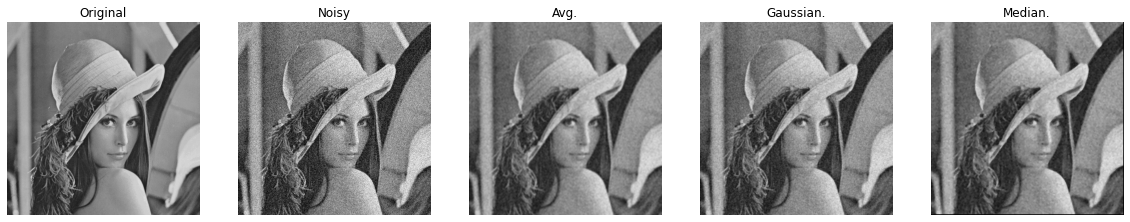


-------------------------------------
#   Lena Noisy 1 | kernel: 7 x 7
-------------------------------------


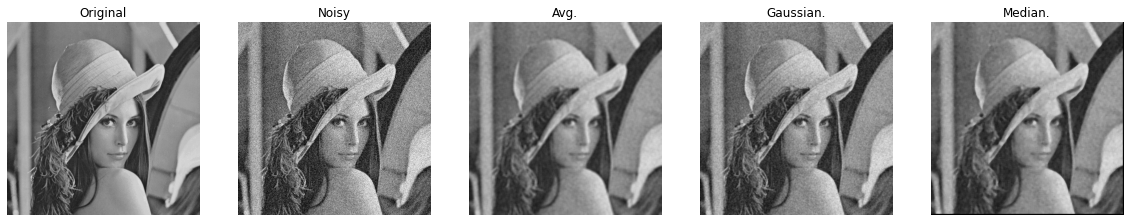


-------------------------------------
#   Lena Noisy 1 | kernel: 9 x 9
-------------------------------------


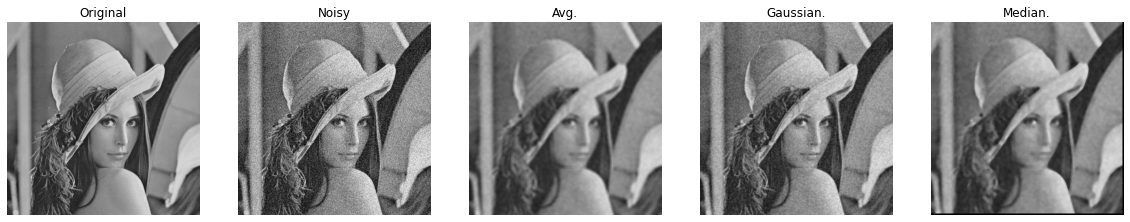


-------------------------------------
#   Lena Noisy 2 | kernel: 5 x 5
-------------------------------------


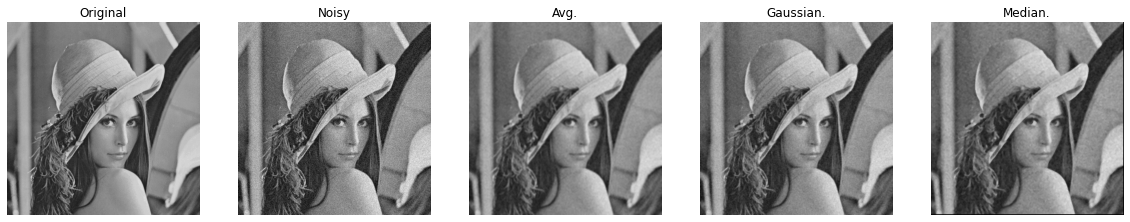


-------------------------------------
#   Lena Noisy 2 | kernel: 7 x 7
-------------------------------------


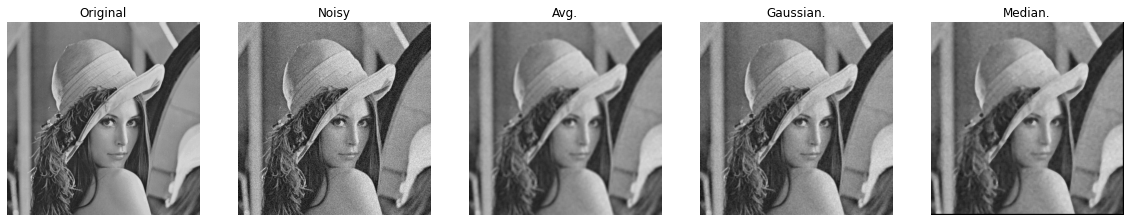


-------------------------------------
#   Lena Noisy 2 | kernel: 9 x 9
-------------------------------------


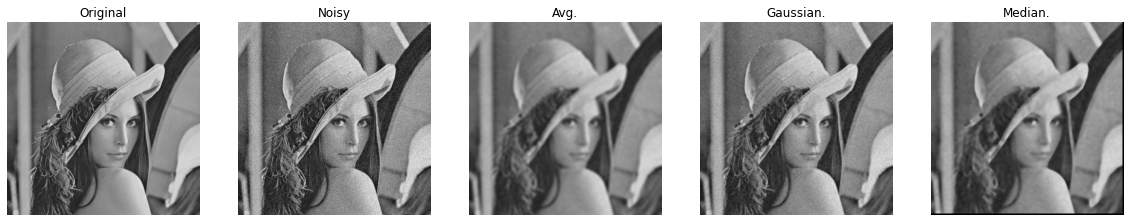


-------------------------------------
#   Lena Noisy 3 | kernel: 5 x 5
-------------------------------------


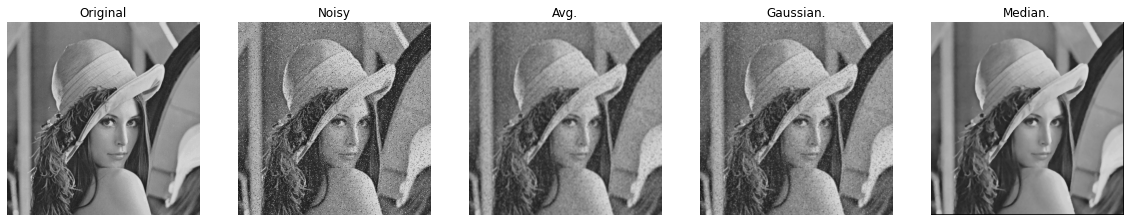


-------------------------------------
#   Lena Noisy 3 | kernel: 7 x 7
-------------------------------------


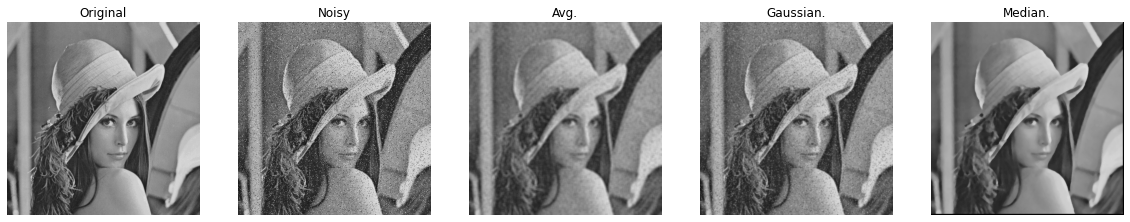


-------------------------------------
#   Lena Noisy 3 | kernel: 9 x 9
-------------------------------------


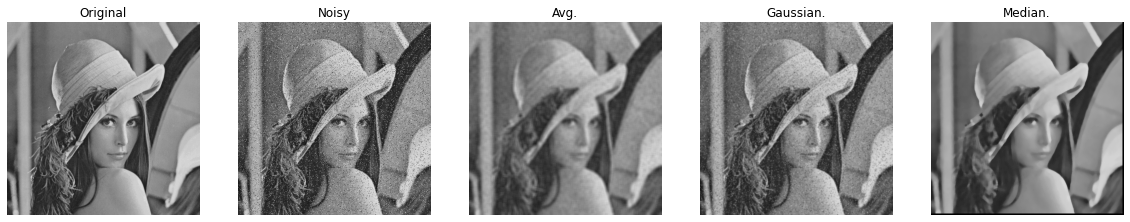

In [9]:
# Do not change codes inside this cell
# Add your observations in next cell

img_arr = [lena_noisy_1, lena_noisy_2, lena_noisy_3]
img_caption = ["Noisy 1", "Noisy 2", "Noisy 3"]

for i in range(3):
    for kernel_size in [5, 7, 9]:
        print("\n-------------------------------------")
        print("#   Lena", img_caption[i], "| kernel:", kernel_size, "x", kernel_size)
        print("-------------------------------------")

        plt.figure(figsize=(20, 13))
        plot_frame(1, 5, 0, lena_orig, "Original")
        plot_frame(1, 5, 1, img_arr[i], "Noisy")

        tmp_img = avgFilter(np.copy(img_arr[i]), kernel_size=kernel_size)
        plot_frame(1, 5, 2, tmp_img, "Avg.")

        tmp_img = gaussianFilter(np.copy(img_arr[i]), kernel_size=kernel_size, sigma=int(kernel_size/5))
        plot_frame(1, 5, 3, tmp_img, "Gaussian.")

        tmp_img = medianFilter(np.copy(img_arr[i]), kernel_size=kernel_size)
        plot_frame(1, 5, 4, tmp_img, "Median.")

        plt.show()

In [10]:
your_observation = """
For Lena Noisy 1, the gaussian filter doesn't reduce the noice much(compared to median and average), but retains the details of the original image better than 
the two. Increase in kernel size, doesn't have a significant difference in the Gaussian filter. The average and median filters here, both filters reduce the 
noice to good extent, but increases the blur with increase in kernel size. The slight difference between the two is that median filter is able to retain more 
finer details/edges of the original than the average.

For Lena Noisy 2, the average filter as last part, decreases noise overall, but increases the blur with increase in kernel size. The gaussian is same as 
previous part. For median filter, the noise is reduced more effectively, for larger kernel sizes. but as last part, increasing kernel size, increases the blur.

For Lena Noisy 3, clearly, median filter works best, just that it increases blur with increase in kernel size. The gaussian is not able to reduce noise to much 
extent. The average filter is as usual, reduces noise but increases blur with increase in kernel size. But it doesn't reduces as much noise as median here.
"""

print(your_observation)


For Lena Noisy 1, the gaussian filter doesn't reduce the noice much(compared to median and average), but retains the details of the original image better than 
the two. Increase in kernel size, doesn't have a significant difference in the Gaussian filter. The average and median filters here, both filters reduce the 
noice to good extent, but increases the blur with increase in kernel size. The slight difference between the two is that median filter is able to retain more 
finer details/edges of the original than the average.

For Lena Noisy 2, the average filter as last part, decreases noise overall, but increases the blur with increase in kernel size. The gaussian is same as 
previous part. For median filter, the noise is reduced more effectively, for larger kernel sizes. but as last part, increasing kernel size, increases the blur.

For Lena Noisy 3, clearly, median filter works best, just that it increases blur with increase in kernel size. The gaussian is not able to reduce noise 

In [11]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

gen_imgs = []
img_arr = [lena_noisy_1, lena_noisy_2, lena_noisy_3]

for i in range(3):
    for kernel_size in [5, 7, 9]:
        tmp_img = avgFilter(np.copy(img_arr[i]), kernel_size=kernel_size)
        gen_imgs.append(tmp_img)
        
        tmp_img = gaussianFilter(np.copy(img_arr[i]), kernel_size=kernel_size, sigma=int(kernel_size/5))
        gen_imgs.append(tmp_img)
        
        tmp_img = medianFilter(np.copy(img_arr[i]), kernel_size=kernel_size)
        gen_imgs.append(tmp_img)

task2_submission = np.array(gen_imgs)